In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [3]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 419s 2us/step


In [5]:
from keras.utils import to_categorical

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

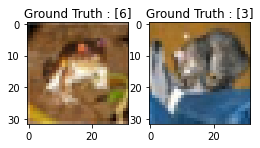

In [6]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [22]:
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [23]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [10]:
model1 = createModel()
batch_size = 256
epochs = 50
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)        

[0.6685773134708405, 0.79339998960495]

Text(0.5, 1.0, 'Loss Curves')

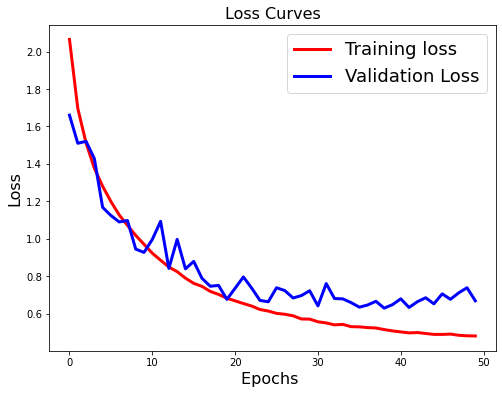

In [11]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [16]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Text(0.5, 1.0, 'Accuracy Curves')

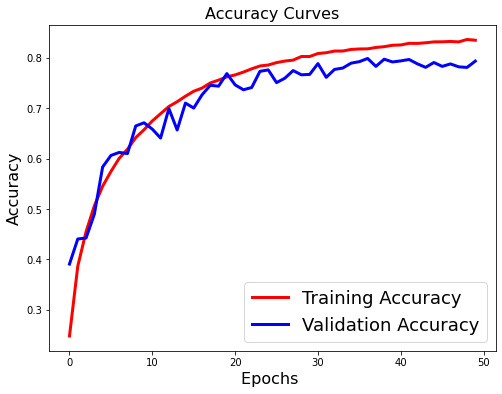

In [17]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [18]:
from keras.datasets import cifar100
(train_images100, train_labels100), (test_images100, test_labels100) = cifar100.load_data(label_mode= 'fine')

169009152/169001437 [==============================] - 338s 2us/step


In [39]:
len(train_images100)

50000

In [59]:
import copy

train_imagesAll = list(copy.deepcopy(train_images))
train_labelsAll = list(copy.deepcopy(train_labels))
test_imagesAll = list(copy.deepcopy(test_images))
test_labelsAll = list(copy.deepcopy(test_labels))
print(type(train_labelsAll[0]))

<class 'numpy.ndarray'>


Необходимый суперкласс: fish - aquarium fish, flatfish, ray, shark, trout

In [60]:
for ind in range (len(train_images100)):
    if train_labels100[ind] == 54 :
        train_imagesAll.append(train_images100[ind])
        train_labelsAll.append(np.array([10], dtype=np.uint8))
    elif train_labels100[ind] == 62 :
        train_imagesAll.append(train_images100[ind])
        train_labelsAll.append(np.array([11], dtype=np.uint8))
    elif train_labels100[ind] == 70 :
        train_imagesAll.append(train_images100[ind])
        train_labelsAll.append(np.array([12], dtype=np.uint8))
    elif train_labels100[ind] == 82 :
        train_imagesAll.append(train_images100[ind])
        train_labelsAll.append(np.array([13], dtype=np.uint8))
    elif train_labels100[ind] == 92 :
        train_imagesAll.append(train_images100[ind])
        train_labelsAll.append(np.array([14], dtype=np.uint8))

for ind in range (len(test_images100)):
    if test_labels100[ind] == 54 :
        test_imagesAll.append(test_images100[ind])
        test_labelsAll.append(np.array([10], dtype=np.uint8))
    elif test_labels100[ind] == 62 :
        test_imagesAll.append(test_images100[ind])
        test_labelsAll.append(np.array([11], dtype=np.uint8))
    elif test_labels100[ind] == 70 :
        test_imagesAll.append(test_images100[ind])
        test_labelsAll.append(np.array([12], dtype=np.uint8))
    elif test_labels100[ind] == 82 :
        test_imagesAll.append(test_images100[ind])
        test_labelsAll.append(np.array([13], dtype=np.uint8))
    elif test_labels100[ind] == 92 :
        test_imagesAll.append(test_images100[ind])
        test_labelsAll.append(np.array([14], dtype=np.uint8))
print(np.unique(train_labelsAll))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [61]:
train_imagesAll = np.array(train_imagesAll)
train_labelsAll = np.array(train_labelsAll)
test_imagesAll = np.array(test_imagesAll)
test_labelsAll = np.array(test_labelsAll)

In [62]:
print('Training data shape : ', train_imagesAll.shape, train_labelsAll.shape)

print('Testing data shape : ', test_imagesAll.shape, test_labelsAll.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labelsAll)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (52500, 32, 32, 3) (52500, 1)
Testing data shape :  (10500, 32, 32, 3) (10500, 1)
Total number of outputs :  15
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [63]:
nRows,nCols,nDims = train_imagesAll.shape[1:]
train_data = train_imagesAll.reshape(train_imagesAll.shape[0], nRows, nCols, nDims)
test_data = test_imagesAll.reshape(test_imagesAll.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labelsAll)
test_labels_one_hot = to_categorical(test_labelsAll)

In [64]:
print('Original label 0 : ', train_labelsAll[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [65]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [66]:
model1 = createModel()
batch_size = 256
epochs = 50
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
model1.evaluate(test_data, test_labels_one_hot)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

[0.8356500850859142, 0.7358095049858093]

Text(0.5, 1.0, 'Loss Curves')

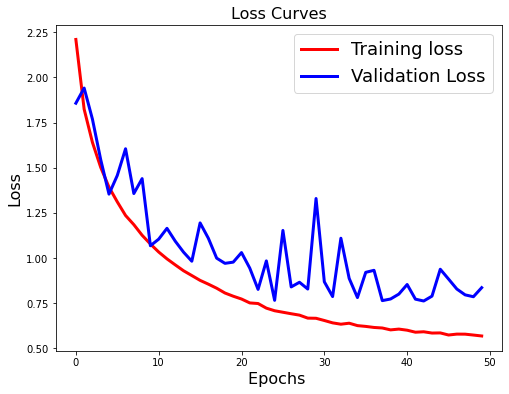

In [67]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [68]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Text(0.5, 1.0, 'Accuracy Curves')

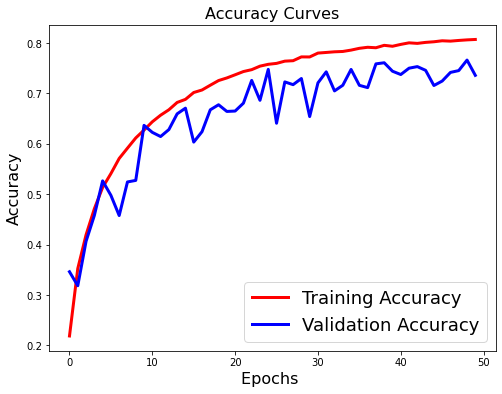

In [69]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [76]:
from sklearn.metrics import classification_report

y_pred = model1.predict(test_data)
print(np.argmax(y_pred, axis = 1))
print()
print(np.argmax(test_labels_one_hot, axis = 1))

#print(classification_report(y_pred, test_labels_one_hot))

[ 3  8  8 ...  1 10 12]

[ 3  8  8 ... 11 10 12]


In [81]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics
y_pred1 = model1.predict(test_data)
y_pred = np.argmax(y_pred1, axis=1)
#print(y_pred)
#rint(np.argmax(test_labels_one_hot, axis=1))
y_true = np.argmax(test_labels_one_hot, axis=1)
# Print f1, precision, and recall scores
print(precision_score(y_true, y_pred, average="macro"))
print(recall_score(y_true, y_pred, average="macro"))
print(f1_score(y_true, y_pred, average="macro"))

print(metrics.confusion_matrix(y_true, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))

0.705121283284425
0.6920666666666668
0.6823895295191001
[[756   6  26  12  23   0  17   0 137  14   5   3   0   0   1]
 [ 17 870   2   2   7   1  17   1  54  26   0   0   2   0   1]
 [ 65   0 621  73  94  14  74   5  25   3  12   3   2   5   4]
 [ 20   2  46 687  73  29  84   3  31   7  14   1   1   1   1]
 [ 13   1  35  43 823   6  50   9  16   0   4   0   0   0   0]
 [ 10   1  38 316  67 470  47   8  14   4  20   1   1   0   3]
 [  4   0  18  54  36   1 867   1  11   0   4   2   1   0   1]
 [ 25   2  24  85 174  24  13 620   7   7  16   0   1   1   1]
 [ 13   8   3  10   7   0   5   0 947   5   2   0   0   0   0]
 [ 27  66   7  21   9   1  15   2  73 770   1   1   2   2   3]
 [  1   1   0   3   0   0   6   0   1   0  80   2   2   0   4]
 [  0   1   1   1   0   3   3   0   1   1   6  58   6   3  16]
 [  2   2   0   2   1   0   5   0   1   0  17  10  54   0   6]
 [  1   0   0   3   3   0   7   0   1   0   3   5   0  75   2]
 [  1   1   4   0   3   0   5   0   0   0  27  11  19   1  28]